# News Classifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fake_News.xlsx to Fake_News.xlsx
Saving Real_News.xlsx to Real_News.xlsx


## Read the Data

In [ ]:
import pandas as pd

In [ ]:
fakeNews = pd.read_excel('Fake_News.xlsx')

In [ ]:
fakeNews.shape

(23697, 3)

In [ ]:
fakeNews['label'] = 1

In [ ]:
fakeNews['news'] = fakeNews['Title'] + fakeNews['News_text']
fakeNews.drop(['News_text','Title'], axis=1, inplace=True)

In [ ]:
fakeNews.head(3)

,Subject,label,news
0,News,1,Harry Reid UNLEASHES Anti-Trump Rant On Senat...
1,left-news,1,BUSTED! MEDIA Caught Red-Handed Trying To Demo...
2,News,1,Trumpâ€™s Latest Appointee Is A Climate Denie...


In [ ]:
realNews = pd.read_excel('Real_News.xlsx')

In [ ]:
realNews.shape

(21755, 3)

In [ ]:
realNews['label'] = 0

In [ ]:
realNews['news'] = realNews['Title'] + realNews['News_text']
realNews.drop(['News_text','Title'], axis=1, inplace=True)
realNews.head(3)

,Subject,label,news
0,politicsNews,0,Trump judicial nominee withdraws from consider...
1,politicsNews,0,No. 2 Democrat in Senate calls on Franken to r...
2,politicsNews,0,"WTO chief won't debate Trump, but rallies supp..."


In [ ]:
print("No. of Fake News : ",fakeNews.shape[0])
print("No. of Real News : ",realNews.shape[0])
print("Total No. of News : ",realNews.shape[0]+fakeNews.shape[0])

No. of Fake News :  23697
No. of Real News :  21755
Total No. of News :  45452


## Merge Two Files

In [ ]:
news = pd.concat([fakeNews,realNews], ignore_index=True)

In [ ]:
print(news.shape)
news.tail(3)

(45452, 3)


,Subject,label,news
45449,politicsNews,0,Highlights: The Trump presidency on March 31 a...
45450,politicsNews,0,New U.S. rule on class actions survives first ...
45451,worldnews,0,Malta offers 1 million-euro reward to find jou...


## shuffling the data 

In [ ]:
## shuffle data to reduce the variance and generality of model
##drop=True prevents reset_index from creating a column containing the old index entries.

news = news.sample(frac=1, random_state=1).reset_index(drop=True)  
print(news.shape)
news.head()

(45452, 3)


,Subject,label,news
0,politicsNews,0,Senate's McConnell still looking at Saudi 9/11...
1,News,1,GOP Board Of Education Candidate May Be The C...
2,News,1,SIX Republican Lawmakers Have Quietly Met Wit...
3,left-news,1,HEREâ€™S WHAT Feminists Left Behind After Thei...
4,politicsNews,0,EU warns Trump against recognizing Jerusalem a...


In [ ]:
df = news.copy()  ## Copy the data to new variable
df.tail()

,Subject,label,news
45447,politicsNews,0,China reiterates opposition to official Taiwan...
45448,worldnews,0,U.N. asks Brazil for peacekeepers for Central ...
45449,politics,1,COLLEGE STUDENTS ASKED TO SIGN A Petition Canc...
45450,politics,1,WOW! TRUMP CROWD IN MICHIGAN IS HUGEâ€¦Bill Cl...
45451,worldnews,0,Teenage IS supporter guilty of plotting attack...


In [ ]:
df.isna().sum()

Subject    0
label      0
news       0
dtype: int64

In [ ]:
## count number of words in each news

df['word count'] = df['news'].apply(lambda x:len(str(x).split(" ")))  

In [ ]:
df[['news','word count']].head(10)

,news,word count
0,Senate's McConnell still looking at Saudi 9/11...,66
1,GOP Board Of Education Candidate May Be The C...,338
2,SIX Republican Lawmakers Have Quietly Met Wit...,551
3,HEREâ€™S WHAT Feminists Left Behind After Thei...,18
4,EU warns Trump against recognizing Jerusalem a...,145
5,(VIDEO) KARL ROVE MISSES THE MARK ON JUST HOW ...,23
6,"Senator Johnson: Trump argued for repealing, r...",133
7,GAY MARRIAGE APPROVED BY SUPREME COURT With Ir...,565
8,Pelosi says Republicans showed 'true colors' i...,97
9,Peru's Kuczynski eyes VP for prime minister af...,484


In [ ]:
df['news'][0]

"Senate's McConnell still looking at Saudi 9/11 lawsuit billWASHINGTON (Reuters) - The majority leader of the U.S. Senate, Republican Mitch McConnell, said on Tuesday he was still considering a bill that would allow U.S. citizens to sue the Saudi Arabian government over the Sept. 11, 2001 attacks and had not set a date for debating the legislation. â€œIâ€™m still looking at it,â€\x9d McConnell told reporters. "

In [ ]:
## drop record if data in 'news' column has identical
print("shape without removing duplicates ",df.shape)
df = df.drop_duplicates(subset=['news'],ignore_index=True) 
print("shape after removing duplicates ",df.shape)

shape without removing duplicates  (45452, 4)
shape after removing duplicates  (39549, 4)


## Exploratory Data Analysis

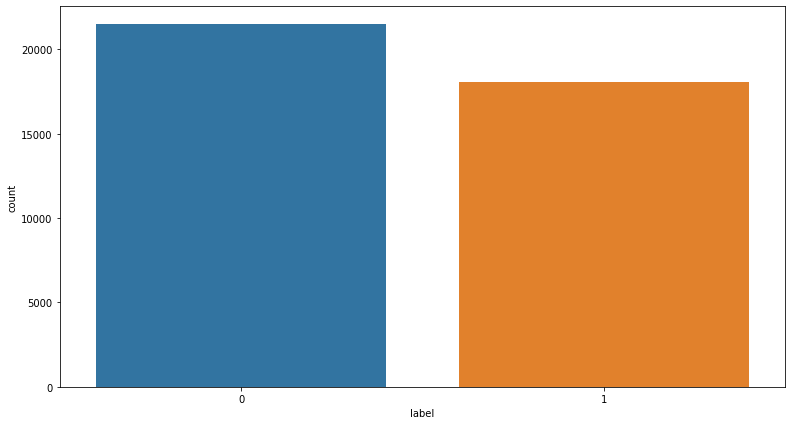

In [ ]:
# Distribution of target Variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [13,7]

sns.countplot(df['label']);

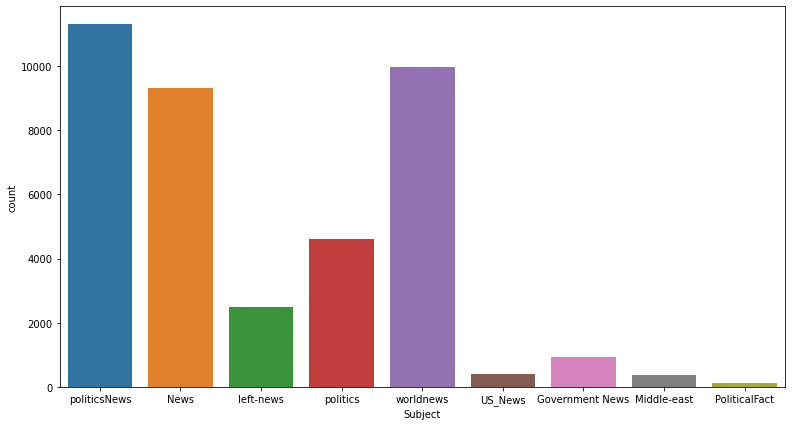

In [ ]:
sns.countplot(df['Subject']);

Our dataset has more political news than any other news followed by world news

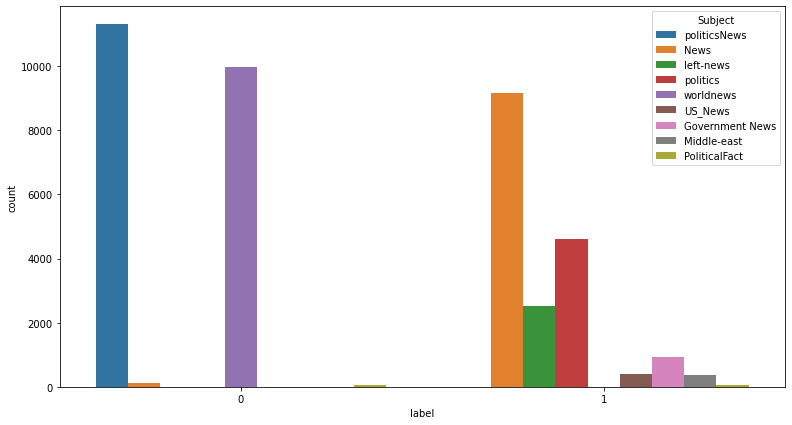

In [ ]:
# Count No. of views by Fake and Real News
sns.countplot(df['label'],hue=df['Subject']);

##### Label 0 : Real news , Label 1 : Fake news

Fake news is all over the category except politics and world news
The real news is present only in politics and world news and the count is high

### Data Distribution

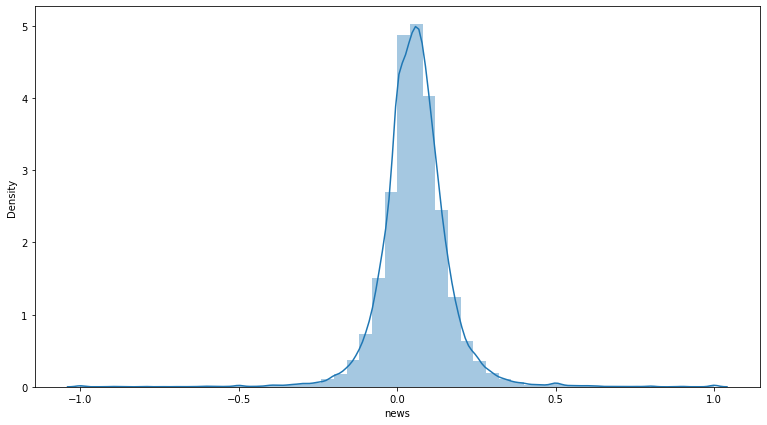

In [ ]:
##  Sentiment Analysis

from textblob import TextBlob

sns.distplot(df['news'].apply(lambda x: TextBlob(x).sentiment[0]),kde=True);

## Most of the polarity is neutral, neither it shows some bad news nor much happy news

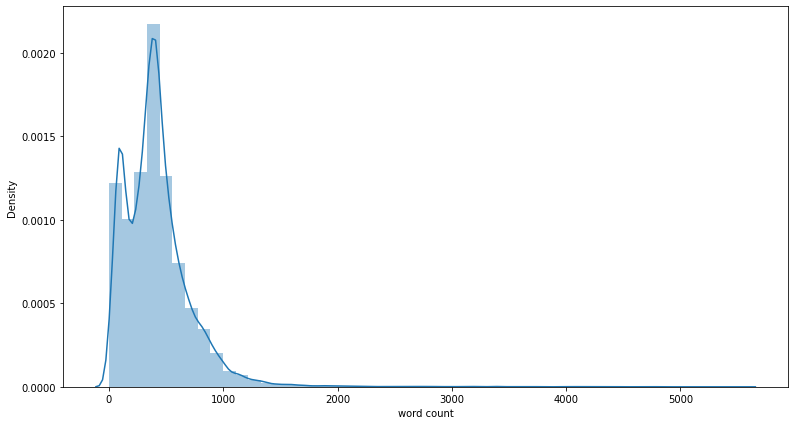

In [ ]:
sns.distplot(df['word count'],kde=True);

In [ ]:
len(df)

39549

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
import re
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['news']=df['news'].apply(lambda x:review_cleaning(x))
df.head()

,Subject,label,news,word count
0,politicsNews,0,senates mcconnell still looking at saudi laws...,66
1,News,1,gop board of education candidate may be the c...,338
2,News,1,six republican lawmakers have quietly met wit...,551
3,left-news,1,hereâ€™s what feminists left behind after thei...,18
4,politicsNews,0,eu warns trump against recognizing jerusalem a...,145


In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
df['news'] = df['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Subject,label,news,word count
0,politicsNews,0,senates mcconnell still looking saudi lawsuit ...,66
1,News,1,gop board education candidate may craziest per...,338
2,News,1,six republican lawmakers quietly met bundy mil...,551
3,left-news,1,hereâ€™s feminists left behind daylong hissy f...,18
4,politicsNews,0,eu warns trump recognizing jerusalem israeli c...,145


## The word count is between 0–1000 

In [ ]:
## Top 20 Unigram
freq = pd.Series(' '.join(df['news']).split()).value_counts()[:20]
freq

said          122069
trump         116212
us             60087
would          50263
president      45397
people         35979
one            30580
state          28292
new            27964
also           27350
reuters        26827
house          25824
donald         25044
republican     24121
government     23969
states         23356
clinton        22403
could          21892
obama          21822
united         21295
dtype: int64

## N-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

**Bigram**

In [ ]:

 ## getting top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)


donald trump 24696
united states 18831
white house 16005
hillary clinton 10017
new york 8692
featured image 7731
president donald 6975
north korea 6956
twitter com 6603
pic twitter 6230
trump said 5213
year old 5174
barack obama 4875
prime minister 4826
president trump 4798
supreme court 4604
said statement 4572
president obama 4380
fox news 4330
islamic state 4227


In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

pic twitter com 6183
president donald trump 5470
president barack obama 3025
new york times 2166
donald trump realdonaldtrump 1794
reuters president donald 1563
black lives matter 1501
21st century wire 1450
president donald trumpâ 1429
president united states 1215
president elect donald 1105
new york city 1061
white house said 1058
president vladimir putin 968
elect donald trump 960
news 21st century 933
national security adviser 921
president barack obamaâ 918
affordable care act 910
director james comey 873


In [ ]:
## nltk.download('brown')

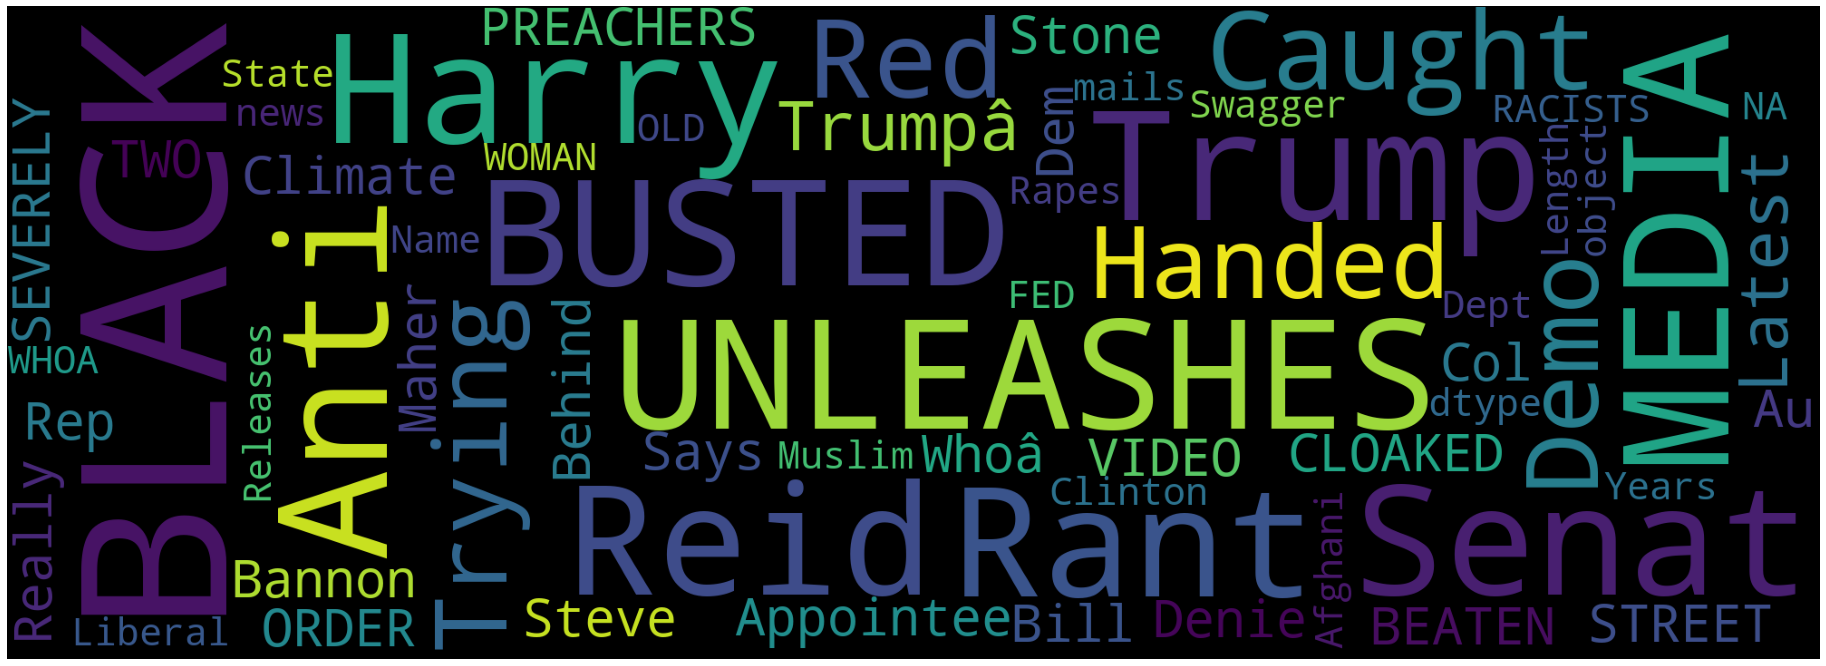

In [ ]:
## Fake News Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['New','YEAR','Gets']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(str(fakeNews['news']))

plt.figure(figsize=(118,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

As we see above, mostly fake news revolved around Harry clinton, Donald Trump, Racism, muslim

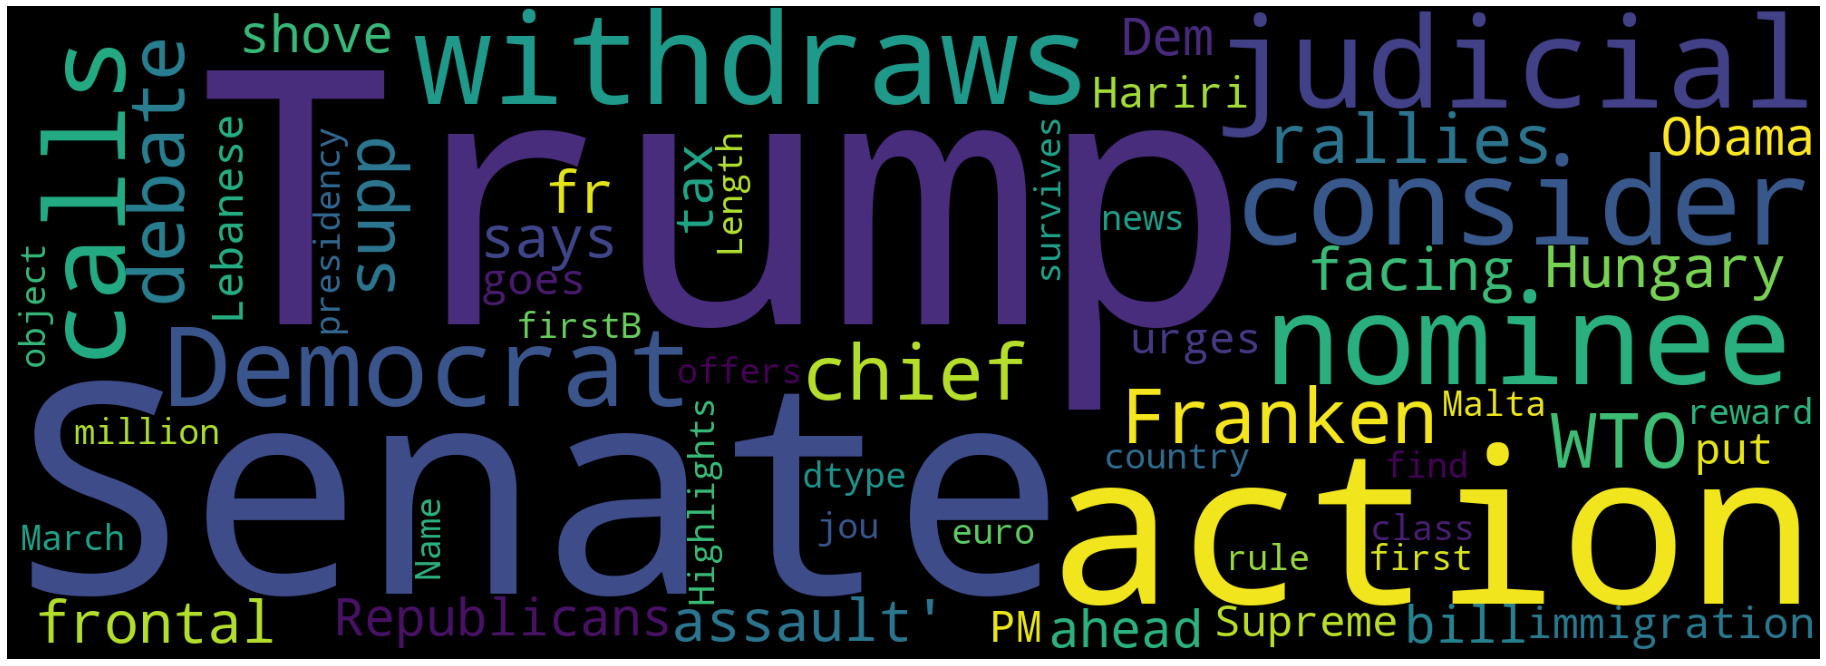

In [ ]:
## Real News Worldcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
custom_stop = list(STOPWORDS) + ['New','YEAR','Gets']
wordcloudimage = WordCloud(max_words=100,
                            stopwords=custom_stop,
                            width=2000,
                            height=720
                          ).generate(str(realNews['news']))

plt.figure(figsize=(118,12))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

Here we can see most of the Real news is related to USA, USA politics, trump, obama

**Word Embedding using TfIdf**

In [ ]:
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
X= tfidf.fit_transform(df['news']).toarray()
X.shape

(39549, 5000)

In [ ]:
X[:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## Target Variable

y = df['label']
y.shape

(39549,)

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
print(X_train)
X_train.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(26497, 5000)

In [ ]:
tfidf.get_feature_names()[:20]

['abc news',
 'abdel fattah',
 'abe said',
 'able get',
 'abortion rights',
 'abraham lincoln',
 'absolutely nothing',
 'according court',
 'according data',
 'according government',
 'according media',
 'according new',
 'according one',
 'according people',
 'according police',
 'according report',
 'according reuters',
 'according reutersipsos',
 'according source',
 'according sources']

In [ ]:
count_df = pd.DataFrame(X_train,columns=[tfidf.get_feature_names()])

In [ ]:
count_df.head()

,abc news,abdel fattah,abe said,able get,abortion rights,abraham lincoln,absolutely nothing,according court,according data,according government,according media,according new,according one,according people,according police,according report,according reuters,according reutersipsos,according source,according sources,according state,according statement,according two,according us,accounts us,accuracy realdonaldtrump,accused trump,acr another,acr hosts,across america,across border,across country,across nation,across state,across united,across us,act like,act would,acting like,action childhood,...,york daily,york new,york post,york real,york reuters,york state,york times,young man,young men,young people,young voters,young woman,young women,youâ ll,youâ re,youâ ve,zealand first,zika virus,œa lot,œamerica firstâ,œdonald trump,œi believe,œi donâ,œi know,œi think,œi want,œi would,œit would,œiâ going,œiâ ve,œmeet pressâ,œone chinaâ,œthe president,œtheyâ re,œthis weekâ,œwe donâ,œwe need,œweâ ll,œweâ re,œweâ ve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.210428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
count_df.info

<bound method DataFrame.info of       abc news abdel fattah abe said able get  ... œwe need œweâ ll œweâ re œweâ ve
0          0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
1          0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
2          0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
3          0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
4          0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
...        ...          ...      ...      ...  ...      ...     ...     ...     ...
26492      0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
26493      0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
26494      0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
26495      0.0          0.0      0.0      0.0  ...      0.0     0.0     0.0     0.0
26496      0.0          0.0      0.0      0.

**Generate Models**

Logistic Regression

In [58]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression()

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7072
           1       0.97      0.97      0.97      5980

    accuracy                           0.97     13052
   macro avg       0.97      0.97      0.97     13052
weighted avg       0.97      0.97      0.97     13052

Predicted     0     1    All
Actual                      
0          6892   180   7072
1           191  5789   5980
All        7083  5969  13052

Accuracy of the model on Testing Sample Data: 0.97

Accuracy values for 10-fold Cross Validation:
 [0.9721821  0.97065199 0.97496097 0.97217951 0.9696518  0.97470378
 0.97471774 0.97168142 0.97623365 0.98128719]

Final Average Accuracy of the model: 0.97


Gaussian Naive Bayes

In [57]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7072
           1       0.95      0.95      0.95      5980

    accuracy                           0.96     13052
   macro avg       0.96      0.96      0.96     13052
weighted avg       0.96      0.96      0.96     13052

Predicted     0     1    All
Actual                      
0          6781   291   7072
1           284  5696   5980
All        7065  5987  13052

Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.95598673 0.9537113  0.95952405 0.95879081 0.95726834 0.95928933
 0.95828517 0.96435865 0.96006386 0.96890078]

Final Average Accuracy of the model: 0.96


As we seen above logistic regression give better Accuracy, selected algo for given problem is LR and now tune the hyperparameters..

**GridSearch Technique used for tuning the model**

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import numpy as np

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.9737794530355487


In [59]:
clf = LogisticRegression(C=3.72)

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X,y)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))
print(pd.crosstab(y_test, prediction, rownames = ['Actual'], colnames =['Predicted'], margins = True))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('\nAccuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7072
           1       0.98      0.99      0.99      5980

    accuracy                           0.99     13052
   macro avg       0.99      0.99      0.99     13052
weighted avg       0.99      0.99      0.99     13052

Predicted     0     1    All
Actual                      
0          6982    90   7072
1            84  5896   5980
All        7066  5986  13052

Accuracy of the model on Testing Sample Data: 0.99

Accuracy values for 10-fold Cross Validation:
 [0.97421536 0.9698997  0.97572477 0.97395293 0.97193609 0.97597035
 0.97623768 0.97370531 0.97724974 0.98179521]

Final Average Accuracy of the model: 0.98
